In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('data/clean_folder/out.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [6]:
categorical_types = ['object']  # the categorical types in Pandas
categorical_columns = df.select_dtypes(include=categorical_types).columns.tolist()
# Isolate the numeric features in group for easier processing
numeric_types = ['float16','float32', 'float64', 'int16', 'int32','int64']   # the numeric types in Pandas
numeric_columns = df.select_dtypes(include=numeric_types).columns.tolist()# data['month'] = data['month'].apply(month_num)
numeric_columns.remove('y')

In [7]:
df[numeric_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:

pd.DataFrame(# mean of 0 and std of 1 but ranges are different
    StandardScaler().fit_transform(df[numeric_columns]), columns=numeric_columns).describe()

,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,2.112250e-16,1.760208e-17,1.257292e-17,6.035001e-17,3.017500e-17,2.011667e-17,4.023334e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-1.002478e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-6.025167e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-3.035165e-01,-2.465603e-01,-4.114531e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,2.362370e-01,7.622994e-02,-4.114531e-01,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.809470e+01,1.944365e+01,8.297431e+00,1.191360e+02


In [9]:
# divide the dataset into training, validation and test set using sklearn train_test_split
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [10]:
print(f'Full Training Set: ', df_train_full.shape)
print(f'Training Set: ', df_train.shape)
print(f'Validation Set: ', df_val.shape)
print(f'Test Set: ', df_test.shape)

Full Training Set:  (36168, 17)
Training Set:  (27126, 17)
Validation Set:  (9042, 17)
Test Set:  (9043, 17)


In [11]:
y_train = df_train['y']
y_val = df_val['y']

In [12]:
del df_train['y']
del df_val['y']

In [14]:
X = df_train.copy()

In [15]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
29980,39,unemployed,married,primary,no,590,yes,no,cellular,4,feb,190,2,-1,0,unknown
30137,53,management,divorced,secondary,no,1355,no,yes,cellular,4,feb,447,2,196,8,other
13175,53,services,divorced,primary,no,0,no,yes,cellular,8,jul,206,1,-1,0,unknown
2300,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown
19876,53,unemployed,divorced,tertiary,no,0,yes,yes,cellular,8,aug,140,2,-1,0,unknown


In [16]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [ ]:
(
    so.Plot(data, x="month")
    .add(so.Bar(), so.Hist())
)

## Isolate the categorical features in group for easier processing

In [17]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [18]:
numeric_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [19]:
X = X[categorical_columns + numeric_columns]


In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [21]:
num_attribs = list(numeric_columns)
cat_attribs = list(categorical_columns)

In [22]:
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [23]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(27126, 16)
(9042, 16)
(9043, 17)


In [24]:
y_train = y_train
y_val = y_val

In [25]:
df_val.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14680,54,retired,married,tertiary,no,4104,no,no,cellular,15,jul,68,8,-1,0,unknown
44495,44,entrepreneur,married,tertiary,no,121,no,no,cellular,10,aug,412,1,-1,0,unknown
13705,42,blue-collar,married,secondary,no,-274,yes,no,cellular,10,jul,75,1,-1,0,unknown
12066,40,blue-collar,married,primary,no,4,no,no,unknown,20,jun,287,9,-1,0,unknown
8213,42,blue-collar,married,secondary,no,443,yes,no,unknown,2,jun,671,5,-1,0,unknown


In [26]:
X_train = full_pipeline.fit_transform(df_train)
#X_train = full_pipeline.transform(df_train)
X_val = full_pipeline.transform(df_val)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_train.value_counts()

y
0    23952
1     3174
Name: count, dtype: int64

In [29]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [30]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7091080593813438

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [32]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8889330527371323

In [33]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8972589329302199

In [34]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
29980,39,unemployed,married,primary,no,590,yes,no,cellular,4,feb,190,2,-1,0,unknown
30137,53,management,divorced,secondary,no,1355,no,yes,cellular,4,feb,447,2,196,8,other
13175,53,services,divorced,primary,no,0,no,yes,cellular,8,jul,206,1,-1,0,unknown
2300,35,technician,married,tertiary,no,1473,yes,no,unknown,12,may,84,3,-1,0,unknown
19876,53,unemployed,divorced,tertiary,no,0,yes,yes,cellular,8,aug,140,2,-1,0,unknown


In [35]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [36]:
all_aucs = {}

for depth in [10, 20, 40]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)
    
    all_aucs[depth] = aucs
    print()

depth: 10
10 -> 0.915
20 -> 0.923
30 -> 0.925
40 -> 0.925
50 -> 0.925
60 -> 0.926
70 -> 0.925
80 -> 0.926
90 -> 0.925
100 -> 0.925
110 -> 0.925
120 -> 0.925
130 -> 0.925
140 -> 0.925
150 -> 0.925
160 -> 0.925
170 -> 0.925
180 -> 0.925
190 -> 0.926
200 -> 0.925

depth: 20
10 -> 0.912
20 -> 0.921
30 -> 0.926
40 -> 0.927
50 -> 0.927
60 -> 0.928
70 -> 0.929
80 -> 0.929
90 -> 0.929
100 -> 0.929
110 -> 0.929
120 -> 0.929
130 -> 0.930
140 -> 0.930
150 -> 0.930
160 -> 0.931
170 -> 0.931
180 -> 0.931
190 -> 0.931
200 -> 0.931

depth: 40
10 -> 0.889
20 -> 0.911
30 -> 0.917
40 -> 0.919
50 -> 0.920
60 -> 0.921
70 -> 0.923
80 -> 0.924
90 -> 0.925
100 -> 0.926
110 -> 0.926
120 -> 0.926
130 -> 0.926
140 -> 0.926
150 -> 0.927
160 -> 0.927
170 -> 0.928
180 -> 0.928
190 -> 0.928
200 -> 0.928



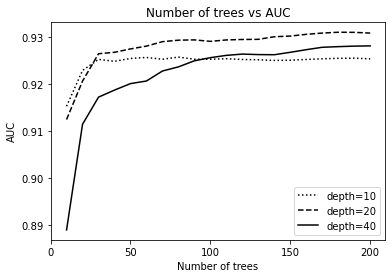

In [37]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[40], label='depth=40', color='black', linestyle='solid')
    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

In [40]:
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [41]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

LogisticRegression 0.9024552090245521
RandomForestClassifier 0.9056624640566246
SVC 0.9043353240433533
VotingClassifier 0.9059942490599425


In [42]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical_columns + numeric_columns].to_dict(orient='records')
val_dict = df_val[categorical_columns + numeric_columns].to_dict(orient='records')
test_dict = df_test[categorical_columns + numeric_columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [43]:
X_train = dv.transform(train_dict)

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.4266138601077776

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import GridSearchCV

In [47]:
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
preprocessor = make_column_transformer((numeric_transformer, num_attribs),(categorical_transformer, cat_attribs))
pipeline = make_pipeline(preprocessor, RandomForestClassifier())
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance', 'day',
                                                   'duration', 'campaign',
                                                   'pdays', 'previous']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [50]:
pipeline.fit(df_train, y_train)
score = pipeline.score(df_val, y_val)
print(score)

0.9053306790533068


In [51]:
import joblib
# Save the pickled object to disk.
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [52]:
import pickle

with open("pipeline2.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [53]:
with open("pipeline2.pkl", "rb") as f:
    model1 = pickle.load(f)

In [54]:
model1.predict_proba(df_test)[0]

array([0.93, 0.07])

In [55]:
prediction = pipeline.predict_proba(df_train)[:, 1]
prediction[0]

0.01

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def learning_func(model):
    numeric_transformer = make_pipeline(StandardScaler())
    categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numeric_transformer, num_attribs),(categorical_transformer, cat_attribs))
    pipeline = make_pipeline(preprocessor, RandomForestClassifier())
    fitted_model = pipeline.fit(df_train, y_train)
    print("Accuracy Score:", fitted_model.score(df_val, y_val))
    model_preds = fitted_model.predict(df_val)
    print(classification_report(y_val, model_preds))
    print(confusion_matrix(y_val, model_preds))


In [57]:
learning_func(RandomForestClassifier(random_state=123, n_estimators=20))

Accuracy Score: 0.9065472240654723
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7978
           1       0.67      0.40      0.50      1064

    accuracy                           0.91      9042
   macro avg       0.80      0.69      0.73      9042
weighted avg       0.89      0.91      0.90      9042

[[7767  211]
 [ 634  430]]
